## Sholastic Data Challenge Introduction
This project is based on an Analytics Challenge hosted by the Institute for Business and Information Technology (IBIT) at Temple University in 2020. The dataset was downloaded from its website and the dataset is a real world data and was porvided by Scholastic for the competition.

### What will the children’s book market look like in the future?

Scholastic is a major international publishing, educational, and media company with a focus on books and educational materials designed to support children’s literacy and cultivate a passion for reading and knowledge which will continue throughout life. Scholastic’s mission is driven by its credo LINK which articulates this goal for the company.

Scholastic has many different channels through which it distributes the books it publishes. At times these channels work collaboratively to reach new customers in different ways, but at times there can be significant overlap between these channels. Through analyzing the interactions of these channels Scholastic seeks to better understand the children’s book market, vis-a-vis demographics, geography, genre, and price.

In the spirit of Scholastic’s mission of cultivating learning, the provided data is presented in a realistic manner, as a small snapshot of Scholastic’s sales between two separate distribution channels across the nation. In an effort to make this a realistic scenario, the data presented is not fully cleaned and there are many additional interesting variables which it is the job of the analyst to identify and evaluate.

Start your analysis by answering question 1 below, and then answer at least one or more of the remaining questions.

1. What trends do you see in the data, among / demographics, genre/ theme, and price?
2. What does the data suggest about Scholastic’s distribution channels, and how would you recommend structuring a distribution strategy?
3. What other publically available data can you append (Census, state, region, etc.), to provide further insight?
4. Formulate a unified strategy for marketing between the two channels. Where are there areas of significant overlap between the channels, and what strategy do you suggest to prevent unintentional competition between channels?

Below are all features in this dataset

- Title: Title of product sold
- TITLE_CODE: Unique ID for titles
- CHANNEL: Masked channel description of channel through which the product was distributed to the customer
- PROD_TYP: Indicator if the product is a paperback or hardback
- SERIES: Y/N indicator if the product is part of a series
- CH1_GENRE: Genre listing for product from Channel 1 database
- CH1_THEME: Theme listing for product from Channel 1 database
- CH2_CATEGORY: Category listing for product from Channel 2 database
- CH2_SUBCATEGORY: Subcategory listing for product from Channel 2 database
- LEXILE_11_DESC: Lexile measures for product. Note this field is not always complete for every Scholastic product. For more information on Lexile codes, see links below:
 - : https://lexile.com/educators/measuring-growth-with-lexile/lexile-measures-grade-equivalents/
 - : https://lexile.com/educators/find-books-at-the-right-level/about-lexile-codes/
- total_units: Number of products sold 
- UNIT_PRICE: Unit price of product sold
- SCHOOL_TYPE: Indicator if the school where the product was sold was public or not.
- REGION: Region of the United States where product was distributed - NORTHEAST, MIDWEST, SOUTH, WEST, or OTHER
- STATE: US state of sale
- COUNTY: County of sale
- EDU_NO_HS: % of population with no HS degree, by zip code
- EDU_HS_SOME_COLLEGE: % of population with some college, by zip code
- EDU_BACHELOR_DEG: % of population with bachelor degree, by zip code
- EDU_GRADUATE_DEG: % of population with graduate degree, by zip code
- HHI_BAND: Bands of household income for zip code, in $10,000 bands
- ZIP_CODE: Zip code of sale

In this exercise, we will perform an exploratory analysis of the dataset. The following activities will be performed:
- read the dataset into spark (I had to change delimiter from comma to pipe.)
- run various exploratory analysis to understand better
- conduct ETL analysis
- run various queries to address the questions in this challenge

## In Class Exercise
In Class Exercise. Below is the question we will discuss in class to adress question 1.
1. Calculate the total books sold and total sales by each channel
2. Calculate the total_sales by channel and product type.
3. Calculate total sales by state
4. What are the top 10 popular books sold in each channel
5. What are the top 10 genre sold in each channel?
6. what are the most popular words appearing in the title of books
7. Is income related to sales? What about other demographic data?
8. Create a dabshabord to put your key findings together.

## Import Dataset

Check the file in the /FileStore/tables directory

In [0]:
%fs ls /FileStore/tables

path,name,size,modificationTime
dbfs:/FileStore/tables/AWInternetSales-1.csv,AWInternetSales-1.csv,11660673,1662001403000
dbfs:/FileStore/tables/AWInternetSales.csv,AWInternetSales.csv,11660673,1662001095000
dbfs:/FileStore/tables/LifeExp.csv,LifeExp.csv,4376,1662006458000
dbfs:/FileStore/tables/LifeExp_headers.csv,LifeExp_headers.csv,4400,1662006459000
dbfs:/FileStore/tables/advert.csv,advert.csv,10926,1662006026000
dbfs:/FileStore/tables/auto1.parquet,auto1.parquet,1177,1662006026000
dbfs:/FileStore/tables/autos.csv,autos.csv,68439217,1662006165000
dbfs:/FileStore/tables/co_est2019_alldata.csv,co_est2019_alldata.csv,3644730,1663006414000
dbfs:/FileStore/tables/cops_02_snappy.parquet,cops_02_snappy.parquet,45972543,1662006121000
dbfs:/FileStore/tables/cops_03_snappy.parquet,cops_03_snappy.parquet,45972543,1662006215000


Make a directory to store data for Scholastic challenge

In [0]:
%fs mkdirs /FileStore/tables/scholastic

res1: Boolean = true

In [0]:
%fs ls /FileStore/tables

path,name,size,modificationTime
dbfs:/FileStore/tables/AWInternetSales-1.csv,AWInternetSales-1.csv,11660673,1662001403000
dbfs:/FileStore/tables/AWInternetSales.csv,AWInternetSales.csv,11660673,1662001095000
dbfs:/FileStore/tables/LifeExp.csv,LifeExp.csv,4376,1662006458000
dbfs:/FileStore/tables/LifeExp_headers.csv,LifeExp_headers.csv,4400,1662006459000
dbfs:/FileStore/tables/advert.csv,advert.csv,10926,1662006026000
dbfs:/FileStore/tables/auto1.parquet,auto1.parquet,1177,1662006026000
dbfs:/FileStore/tables/autos.csv,autos.csv,68439217,1662006165000
dbfs:/FileStore/tables/co_est2019_alldata.csv,co_est2019_alldata.csv,3644730,1663006414000
dbfs:/FileStore/tables/cops_02_snappy.parquet,cops_02_snappy.parquet,45972543,1662006121000
dbfs:/FileStore/tables/cops_03_snappy.parquet,cops_03_snappy.parquet,45972543,1662006215000


- Add the dataset into /scholastic directory.
- Go to Data icon on the left panel and import sdata.csv and state_abbrev.csv into scholastic directory. It will take a few minutes due to the size of the file
- Check to see it is there.
 - Note: I have to change delimiter of the file from comma to pipe. Otherwise, the file will not be able to load properly.

Check the see the files are already there

In [0]:
%fs ls /FileStore/tables/scholastic


path,name,size,modificationTime
dbfs:/FileStore/tables/scholastic/sdata.csv,sdata.csv,421879198,1663607952000
dbfs:/FileStore/tables/scholastic/state_abbrev.csv,state_abbrev.csv,1167,1663607322000
dbfs:/FileStore/tables/scholastic/us_county_population.csv,us_county_population.csv,3644730,1663607331000


Check the first few rows of data

In [0]:
%fs head  /FileStore/tables/scholastic/sdata.csv 

[Truncated to first 65536 bytes]
title|TITLE_CODE|CHANNEL|PROD_TYP|SERIES|CH1_GENRE|CH1_THEME|CH2_CATEGORY|CH2_SUBCATEGORY|LEXILE_11_DESC|total_units|UNIT_PRICE|SCHOOL_TYPE|REGION|STATE|COUNTY|EDU_NO_HS|EDU_HS_SOME_COLLEGE|EDU_BACHELOR_DEG|EDU_GRADUATE_DEG|HHI_BAND|ZIP_CODE
Dog Man: Lord of the Fleas|71797|CHANNEL 2|HARDBACK|Y|['Humor & Funny Stories', 'Action & Adventure']|['Reluctant Reader Appeal', 'Superheroes']|GRAPHIC NOVELS|||2|9.99|OTHER|OTHER||||||||.
Grumpy Pants|72780|CHANNEL 2|PAPERBACK|N||['Emotions & Feelings', 'Bedtime & Dreams', 'Penguins']|||AD380L|1|4.95|OTHER|OTHER||||||||.
Walk and See: 123|77338|CHANNEL 2|PAPERBACK|N||['Counting, Numbers & Place Value', 'Fall', 'Seasons']||||2|4.95|OTHER|OTHER||||||||.
Dog Man: Lord of the Fleas|71797|CHANNEL 2|HARDBACK|Y|['Humor & Funny Stories', 'Action & Adventure']|['Reluctant Reader Appeal', 'Superheroes']|GRAPHIC NOVELS|||1|9.99|OTHER|OTHER||||||||.
Pete the Cat and the Missing Cupcakes|75211|CHANNEL 2|PAPERBACK|N||['Kindness', 'Cooking & Food', 'Friendship']|PICTURE|PAPERBACK BOOK|AD440L|1|6.95|OTHER|OTHER||||||||.
When I Grow Up|77501|CHANNEL 2|PAPERBACK|N|['Poetry, Songs & Verse']|['Growing Up']||||1|5.95|OTHER|OTHER||||||||.
Grow Up, David!|72771|CHANNEL 2|HARDBACK|N|['Humor & Funny Stories']|['Brothers & Sisters', 'Family Life', 'Behavior & Manners']|PICTURE|HC/POB BOOK||1|17.99|OTHER|OTHER||||||||.
Amelia Bedelia on the Move|70281|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Reluctant Reader Appeal', 'Family Life']||||2|4|OTHER|OTHER||||||||.
I Am Jane Goodall|73201|CHANNEL 2|PAPERBACK|N|['Biography & Autobiography']|['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal']|INSTRUCTION RESOURCE DIVISION|PRIMARY NONFICTION|580L|1|5.5|OTHER|OTHER||||||||.
Escape from Shudder Mansion|72020|CHANNEL 2|PAPERBACK|Y|['Horror & Supernatural']|['Monsters & Ghosts', 'Reluctant Reader Appeal']|MYSTERY|||1|6.99|OTHER|OTHER||||||||.
Mr. Will Needs to Chill!|74570|CHANNEL 2|PAPERBACK|Y|['School Stories', 'Humor & Funny Stories']|['School Life', 'Teachers', 'Cooking & Food', 'Reluctant Reader Appeal']|CHAPTER|||1|4.99|OTHER|OTHER||||||||.
Double Down|71855|CHANNEL 2|PAPERBACK|Y|['Humor & Funny Stories']|['Middle School', 'Halloween', 'Movies', 'Reluctant Reader Appeal']|HUMOR||990L|1|8.99|OTHER|OTHER||||||||.
Big Red Barn|70745|CHANNEL 2|PAPERBACK|N|['Classics']|['Farm Animals', 'Bedtime & Dreams']|PICTURE|PAPERBACK BOOK|AD490L|1|5.95|OTHER|OTHER||||||||.
Napping House, The|74710|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Bedtime & Dreams']|PICTURE|PAPERBACK BOOK|NP|1|5.5|OTHER|OTHER||||||||.
Collector, The|71331|CHANNEL 2|PAPERBACK|N|['Horror & Supernatural']|['Paranormal', 'Brothers & Sisters', 'Monsters & Ghosts']|MYSTERY|||2|6.99|OTHER|OTHER||||||||.
Halloween Joke Book, The|72829|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Jokes & Riddles', 'Halloween']||||1||OTHER|OTHER||||||||.
Duck on a Bike|71906|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Farm Animals', 'Birds', 'Cleverness & Resourcefulness', 'Outdoor Recreation']|PICTURE||AD440L|1||OTHER|OTHER||||||||.
Bonaparte Falls Apart|70855|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Monsters & Ghosts', 'Friendship', 'First Day of School']||||1||OTHER|OTHER||||||||.
Mighty, Mighty Construction Site|74401|CHANNEL 2|PAPERBACK|N||['Construction Machines', 'Transportation & Vehicles', 'Building', 'Teamwork', 'Trucks']|||AD710L|1|5.95|OTHER|OTHER||||||||.
Vampoodle|77282|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Dogs', 'Halloween', 'Animals']|INSTRUCTION RESOURCE DIVISION|PRIMARY FICTION|300L|1|3.99|OTHER|OTHER||||||||.
How the Crayons Saved the Rainbow|73127|CHANNEL 2|PAPERBACK|N||['Friendship']|||AD530L|1|4.95|OTHER|OTHER||||||||.
Go Go Gorillas|72616|CHANNEL 2|PAPERBACK|N||['Monkeys, Apes & Other Primates', 'Bedtime & Dreams', 'Dance']||||1|5.5|OTHER|OTHER||||||||.
Restart|75709|CHANNEL 2|PAPERBACK|N|['School Stories', 'Humor & Funny Stories']

We can calso download the data directly from web site. 

We will download the file from my AWS s3 storage directly and save it under /FileStore/talbes.

### Below command will not work on Databrick Community Edition

In [0]:
%sh wget https://isa460-fall2021.s3.amazonaws.com/sdata.csv && cp sdata.csv /dbfs/FileStore/tables

## Load the dataset and create a temp view

In [0]:
scholastic=spark.read.option("delimiter", "|").csv("/FileStore/tables/scholastic/sdata.csv", header=True, inferSchema=True)

scholastic.createOrReplaceTempView("BooksTable")


In [0]:
display(scholastic)

title,TITLE_CODE,CHANNEL,PROD_TYP,SERIES,CH1_GENRE,CH1_THEME,CH2_CATEGORY,CH2_SUBCATEGORY,LEXILE_11_DESC,total_units,UNIT_PRICE,SCHOOL_TYPE,REGION,STATE,COUNTY,EDU_NO_HS,EDU_HS_SOME_COLLEGE,EDU_BACHELOR_DEG,EDU_GRADUATE_DEG,HHI_BAND,ZIP_CODE
Dog Man: Lord of the Fleas,71797,CHANNEL 2,HARDBACK,Y,"['Humor & Funny Stories', 'Action & Adventure']","['Reluctant Reader Appeal', 'Superheroes']",GRAPHIC NOVELS,null,null,2,9.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Grumpy Pants,72780,CHANNEL 2,PAPERBACK,N,null,"['Emotions & Feelings', 'Bedtime & Dreams', 'Penguins']",null,null,AD380L,1,4.95,OTHER,OTHER,null,null,null,null,null,null,null,.
Walk and See: 123,77338,CHANNEL 2,PAPERBACK,N,null,"['Counting, Numbers & Place Value', 'Fall', 'Seasons']",null,null,null,2,4.95,OTHER,OTHER,null,null,null,null,null,null,null,.
Dog Man: Lord of the Fleas,71797,CHANNEL 2,HARDBACK,Y,"['Humor & Funny Stories', 'Action & Adventure']","['Reluctant Reader Appeal', 'Superheroes']",GRAPHIC NOVELS,null,null,1,9.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Pete the Cat and the Missing Cupcakes,75211,CHANNEL 2,PAPERBACK,N,null,"['Kindness', 'Cooking & Food', 'Friendship']",PICTURE,PAPERBACK BOOK,AD440L,1,6.95,OTHER,OTHER,null,null,null,null,null,null,null,.
When I Grow Up,77501,CHANNEL 2,PAPERBACK,N,"['Poetry, Songs & Verse']",['Growing Up'],null,null,null,1,5.95,OTHER,OTHER,null,null,null,null,null,null,null,.
"Grow Up, David!",72771,CHANNEL 2,HARDBACK,N,['Humor & Funny Stories'],"['Brothers & Sisters', 'Family Life', 'Behavior & Manners']",PICTURE,HC/POB BOOK,null,1,17.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Amelia Bedelia on the Move,70281,CHANNEL 2,PAPERBACK,N,['Humor & Funny Stories'],"['Reluctant Reader Appeal', 'Family Life']",null,null,null,2,4.0,OTHER,OTHER,null,null,null,null,null,null,null,.
I Am Jane Goodall,73201,CHANNEL 2,PAPERBACK,N,['Biography & Autobiography'],"['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal']",INSTRUCTION RESOURCE DIVISION,PRIMARY NONFICTION,580L,1,5.5,OTHER,OTHER,null,null,null,null,null,null,null,.
Escape from Shudder Mansion,72020,CHANNEL 2,PAPERBACK,Y,['Horror & Supernatural'],"['Monsters & Ghosts', 'Reluctant Reader Appeal']",MYSTERY,null,null,1,6.99,OTHER,OTHER,null,null,null,null,null,null,null,.


In [0]:
# instead of letting Spark infer the schema, we define schema for our data using DDL. This will make read big data set faster since Spark does not need to guess the structure of data

schema = "`title` STRING,\
 `TITLE_CODE` STRING,\
 `CHANNEL` STRING,\
`PROD_TYP` STRING,\
 `SERIES` STRING,\
 `CH1_GENRE` STRING,\
 `CH1_THEME` STRING,\
 `CH2_CATEGORY` STRING,\
 `CH2_SUBCATEGORY` STRING,\
 `EXILE_11_DESC` STRING,\
 `total_units` INT,\
 `UNIT_PRICE` DOUBLE,\
 `CHOOL_TYPE` STRING,\
 `REGION` STRING,\
 `STATE` STRING,\
 `COUNTY` STRING,\
 `EDU_NO_HS` DOUBLE,\
 `EDU_HS_SOME_COLLEGE` DOUBLE,\
 `EDU_BACHELOR_DEG` DOUBLE,\
 `EDU_GRADUATE_DEG` DOUBLE,\
 `HHI_BAND` STRING,\
 `ZIP_CODE` STRING"

In [0]:
scholastic_s =spark.read.schema(schema)\
 .option("header", "true")\
 .option("mode", "DROPMALFORMED")\
 .option("delimiter", "|")\
 .csv("/FileStore/tables/scholastic/sdata.csv")

In [0]:
display(scholastic_s)

title,TITLE_CODE,CHANNEL,PROD_TYP,SERIES,CH1_GENRE,CH1_THEME,CH2_CATEGORY,CH2_SUBCATEGORY,EXILE_11_DESC,total_units,UNIT_PRICE,CHOOL_TYPE,REGION,STATE,COUNTY,EDU_NO_HS,EDU_HS_SOME_COLLEGE,EDU_BACHELOR_DEG,EDU_GRADUATE_DEG,HHI_BAND,ZIP_CODE
Dog Man: Lord of the Fleas,71797,CHANNEL 2,HARDBACK,Y,"['Humor & Funny Stories', 'Action & Adventure']","['Reluctant Reader Appeal', 'Superheroes']",GRAPHIC NOVELS,null,null,2,9.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Grumpy Pants,72780,CHANNEL 2,PAPERBACK,N,null,"['Emotions & Feelings', 'Bedtime & Dreams', 'Penguins']",null,null,AD380L,1,4.95,OTHER,OTHER,null,null,null,null,null,null,null,.
Walk and See: 123,77338,CHANNEL 2,PAPERBACK,N,null,"['Counting, Numbers & Place Value', 'Fall', 'Seasons']",null,null,null,2,4.95,OTHER,OTHER,null,null,null,null,null,null,null,.
Dog Man: Lord of the Fleas,71797,CHANNEL 2,HARDBACK,Y,"['Humor & Funny Stories', 'Action & Adventure']","['Reluctant Reader Appeal', 'Superheroes']",GRAPHIC NOVELS,null,null,1,9.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Pete the Cat and the Missing Cupcakes,75211,CHANNEL 2,PAPERBACK,N,null,"['Kindness', 'Cooking & Food', 'Friendship']",PICTURE,PAPERBACK BOOK,AD440L,1,6.95,OTHER,OTHER,null,null,null,null,null,null,null,.
When I Grow Up,77501,CHANNEL 2,PAPERBACK,N,"['Poetry, Songs & Verse']",['Growing Up'],null,null,null,1,5.95,OTHER,OTHER,null,null,null,null,null,null,null,.
"Grow Up, David!",72771,CHANNEL 2,HARDBACK,N,['Humor & Funny Stories'],"['Brothers & Sisters', 'Family Life', 'Behavior & Manners']",PICTURE,HC/POB BOOK,null,1,17.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Amelia Bedelia on the Move,70281,CHANNEL 2,PAPERBACK,N,['Humor & Funny Stories'],"['Reluctant Reader Appeal', 'Family Life']",null,null,null,2,4.0,OTHER,OTHER,null,null,null,null,null,null,null,.
I Am Jane Goodall,73201,CHANNEL 2,PAPERBACK,N,['Biography & Autobiography'],"['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal']",INSTRUCTION RESOURCE DIVISION,PRIMARY NONFICTION,580L,1,5.5,OTHER,OTHER,null,null,null,null,null,null,null,.
Escape from Shudder Mansion,72020,CHANNEL 2,PAPERBACK,Y,['Horror & Supernatural'],"['Monsters & Ghosts', 'Reluctant Reader Appeal']",MYSTERY,null,null,1,6.99,OTHER,OTHER,null,null,null,null,null,null,null,.


## Check Summary and Descriptive Statistics. 
See [this link for more detail](https://databricks.com/blog/2015/06/02/statistical-and-mathematical-functions-with-dataframes-in-spark.html)
The function **describe** returns a DataFrame containing information such as number of non-null entries (count), mean, standard deviation, and minimum and maximum value for each numerical column.

In [0]:
display(scholastic.limit(10).describe())

summary,title,TITLE_CODE,CHANNEL,PROD_TYP,SERIES,CH1_GENRE,CH1_THEME,CH2_CATEGORY,CH2_SUBCATEGORY,LEXILE_11_DESC,total_units,UNIT_PRICE,SCHOOL_TYPE,REGION,STATE,COUNTY,EDU_NO_HS,EDU_HS_SOME_COLLEGE,EDU_BACHELOR_DEG,EDU_GRADUATE_DEG,HHI_BAND,ZIP_CODE
count,10,10,10,10,10,7,10,6,3,3,10,10,10,10,0,0,0,0,0,0,0,10
mean,null,73469.7,null,null,null,null,null,null,null,null,1.3,7.726000000000001,null,null,null,null,null,null,null,null,null,null
stddev,null,2430.1030179352024,null,null,null,null,null,null,null,null,0.48304589153964794,4.13856711650032,null,null,null,null,null,null,null,null,null,null
min,Amelia Bedelia on the Move,70281,CHANNEL 2,HARDBACK,N,['Biography & Autobiography'],"['Brothers & Sisters', 'Family Life', 'Behavior & Manners']",GRAPHIC NOVELS,HC/POB BOOK,580L,1,4.0,OTHER,OTHER,null,null,null,null,null,null,null,.
max,When I Grow Up,77501,CHANNEL 2,PAPERBACK,Y,"['Poetry, Songs & Verse']","['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal']",PICTURE,PRIMARY NONFICTION,AD440L,2,17.99,OTHER,OTHER,null,null,null,null,null,null,null,.


In [0]:
# If you have a DataFrame with a large number of columns, you can also run describe on a subset of the columns:

display(scholastic.describe("total_units", "Unit_price"))


summary,total_units,Unit_price
count,2000000,1640709
mean,1.543468,7.405877971034814
stddev,3.7188103538297446,6.608021471066125
min,0,0.0
max,1200,1795.0


In [0]:
# check the correlation between total_units and unit_price

scholastic.stat.corr("total_units", "unit_price")

Out[11]: -0.0043944232046302335

In [0]:
display(scholastic)

title,TITLE_CODE,CHANNEL,PROD_TYP,SERIES,CH1_GENRE,CH1_THEME,CH2_CATEGORY,CH2_SUBCATEGORY,LEXILE_11_DESC,total_units,UNIT_PRICE,SCHOOL_TYPE,REGION,STATE,COUNTY,EDU_NO_HS,EDU_HS_SOME_COLLEGE,EDU_BACHELOR_DEG,EDU_GRADUATE_DEG,HHI_BAND,ZIP_CODE
Dog Man: Lord of the Fleas,71797,CHANNEL 2,HARDBACK,Y,"['Humor & Funny Stories', 'Action & Adventure']","['Reluctant Reader Appeal', 'Superheroes']",GRAPHIC NOVELS,null,null,2,9.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Grumpy Pants,72780,CHANNEL 2,PAPERBACK,N,null,"['Emotions & Feelings', 'Bedtime & Dreams', 'Penguins']",null,null,AD380L,1,4.95,OTHER,OTHER,null,null,null,null,null,null,null,.
Walk and See: 123,77338,CHANNEL 2,PAPERBACK,N,null,"['Counting, Numbers & Place Value', 'Fall', 'Seasons']",null,null,null,2,4.95,OTHER,OTHER,null,null,null,null,null,null,null,.
Dog Man: Lord of the Fleas,71797,CHANNEL 2,HARDBACK,Y,"['Humor & Funny Stories', 'Action & Adventure']","['Reluctant Reader Appeal', 'Superheroes']",GRAPHIC NOVELS,null,null,1,9.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Pete the Cat and the Missing Cupcakes,75211,CHANNEL 2,PAPERBACK,N,null,"['Kindness', 'Cooking & Food', 'Friendship']",PICTURE,PAPERBACK BOOK,AD440L,1,6.95,OTHER,OTHER,null,null,null,null,null,null,null,.
When I Grow Up,77501,CHANNEL 2,PAPERBACK,N,"['Poetry, Songs & Verse']",['Growing Up'],null,null,null,1,5.95,OTHER,OTHER,null,null,null,null,null,null,null,.
"Grow Up, David!",72771,CHANNEL 2,HARDBACK,N,['Humor & Funny Stories'],"['Brothers & Sisters', 'Family Life', 'Behavior & Manners']",PICTURE,HC/POB BOOK,null,1,17.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Amelia Bedelia on the Move,70281,CHANNEL 2,PAPERBACK,N,['Humor & Funny Stories'],"['Reluctant Reader Appeal', 'Family Life']",null,null,null,2,4.0,OTHER,OTHER,null,null,null,null,null,null,null,.
I Am Jane Goodall,73201,CHANNEL 2,PAPERBACK,N,['Biography & Autobiography'],"['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal']",INSTRUCTION RESOURCE DIVISION,PRIMARY NONFICTION,580L,1,5.5,OTHER,OTHER,null,null,null,null,null,null,null,.
Escape from Shudder Mansion,72020,CHANNEL 2,PAPERBACK,Y,['Horror & Supernatural'],"['Monsters & Ghosts', 'Reluctant Reader Appeal']",MYSTERY,null,null,1,6.99,OTHER,OTHER,null,null,null,null,null,null,null,.


In [0]:
# check the frequency by channel and product type

scholastic.stat.crosstab("CHANNEL", "PROD_TYP").show()

+----------------+--------+---------+
|CHANNEL_PROD_TYP|HARDBACK|PAPERBACK|
+----------------+--------+---------+
|       CHANNEL 1|  126737|   702177|
|       CHANNEL 2|   91047|  1080039|
+----------------+--------+---------+



## Spark SQL

Check the first 100 records

In [0]:
%sql
select * from BooksTable
limit 100

title,TITLE_CODE,CHANNEL,PROD_TYP,SERIES,CH1_GENRE,CH1_THEME,CH2_CATEGORY,CH2_SUBCATEGORY,LEXILE_11_DESC,total_units,UNIT_PRICE,SCHOOL_TYPE,REGION,STATE,COUNTY,EDU_NO_HS,EDU_HS_SOME_COLLEGE,EDU_BACHELOR_DEG,EDU_GRADUATE_DEG,HHI_BAND,ZIP_CODE
Dog Man: Lord of the Fleas,71797,CHANNEL 2,HARDBACK,Y,"['Humor & Funny Stories', 'Action & Adventure']","['Reluctant Reader Appeal', 'Superheroes']",GRAPHIC NOVELS,null,null,2,9.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Grumpy Pants,72780,CHANNEL 2,PAPERBACK,N,null,"['Emotions & Feelings', 'Bedtime & Dreams', 'Penguins']",null,null,AD380L,1,4.95,OTHER,OTHER,null,null,null,null,null,null,null,.
Walk and See: 123,77338,CHANNEL 2,PAPERBACK,N,null,"['Counting, Numbers & Place Value', 'Fall', 'Seasons']",null,null,null,2,4.95,OTHER,OTHER,null,null,null,null,null,null,null,.
Dog Man: Lord of the Fleas,71797,CHANNEL 2,HARDBACK,Y,"['Humor & Funny Stories', 'Action & Adventure']","['Reluctant Reader Appeal', 'Superheroes']",GRAPHIC NOVELS,null,null,1,9.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Pete the Cat and the Missing Cupcakes,75211,CHANNEL 2,PAPERBACK,N,null,"['Kindness', 'Cooking & Food', 'Friendship']",PICTURE,PAPERBACK BOOK,AD440L,1,6.95,OTHER,OTHER,null,null,null,null,null,null,null,.
When I Grow Up,77501,CHANNEL 2,PAPERBACK,N,"['Poetry, Songs & Verse']",['Growing Up'],null,null,null,1,5.95,OTHER,OTHER,null,null,null,null,null,null,null,.
"Grow Up, David!",72771,CHANNEL 2,HARDBACK,N,['Humor & Funny Stories'],"['Brothers & Sisters', 'Family Life', 'Behavior & Manners']",PICTURE,HC/POB BOOK,null,1,17.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Amelia Bedelia on the Move,70281,CHANNEL 2,PAPERBACK,N,['Humor & Funny Stories'],"['Reluctant Reader Appeal', 'Family Life']",null,null,null,2,4.0,OTHER,OTHER,null,null,null,null,null,null,null,.
I Am Jane Goodall,73201,CHANNEL 2,PAPERBACK,N,['Biography & Autobiography'],"['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal']",INSTRUCTION RESOURCE DIVISION,PRIMARY NONFICTION,580L,1,5.5,OTHER,OTHER,null,null,null,null,null,null,null,.
Escape from Shudder Mansion,72020,CHANNEL 2,PAPERBACK,Y,['Horror & Supernatural'],"['Monsters & Ghosts', 'Reluctant Reader Appeal']",MYSTERY,null,null,1,6.99,OTHER,OTHER,null,null,null,null,null,null,null,.


Check the total number of the records. The total records are 2 millions

In [0]:
%sql
select count(*)
from BooksTable;

count(1)
2000000


### Question 1: Calculate the total books sold and total sales by each channel

In [0]:
%sql
select channel, sum(total_units) as total_quantity, round(sum(total_units*unit_price),2) as total_sales
from BooksTable
group by channel
order by total_sales desc


channel,total_quantity,total_sales
CHANNEL 2,1868272,1.100396478E7
CHANNEL 1,1218664,7533980.06


### Question 2: Calculate the total_sales by channel and product type.

In [0]:
%sql
select channel, prod_typ, round(sum(total_units*unit_price),2) as total_sales
from BooksTable
group by channel, prod_typ
order by total_sales desc

channel,prod_typ,total_sales
CHANNEL 2,PAPERBACK,9948612.24
CHANNEL 1,PAPERBACK,5609680.57
CHANNEL 1,HARDBACK,1924299.49
CHANNEL 2,HARDBACK,1055352.54


### Question 3: Calculate the total sales by state

In [0]:
%sql
select state, sum(total_units*unit_price) as total_sales
from BooksTable
group by state
order by total_sales DESC

state,total_sales
CA,2248928.5399977313
TX,1597040.559998641
FL,1061997.759999032
IL,830983.329999509
PA,801505.6599995478
NY,798799.6899995069
MI,654134.5999998045
GA,600415.6599998827
OH,564925.4099999106
IN,532641.3499999231


Refine the result and remove invalid states

In [0]:
%fs ls /FileStore/tables/scholastic

path,name,size,modificationTime
dbfs:/FileStore/tables/scholastic/sdata.csv,sdata.csv,421879198,1663607952000
dbfs:/FileStore/tables/scholastic/state_abbrev.csv,state_abbrev.csv,1167,1663607322000
dbfs:/FileStore/tables/scholastic/us_county_population.csv,us_county_population.csv,3644730,1663607331000


Import a table with valid state abbreviation

In [0]:
state_abbrev=spark.read.option("inferSchema", "true")\
 .option("header", "true")\
 .option("delimiter", "|")\
 .csv("/FileStore/tables/scholastic/state_abbrev.csv")

state_abbrev.createOrReplaceTempView("stateTable")



In [0]:
%sql
select *
from stateTable

State,State_Abbrev,Capital
Alabama,AL,Montgomery
Alaska,AK,Juneau
Arizona,AZ,Phoenix
Arkansas,AR,Little Rock
California,CA,Sacramento
Colorado,CO,Denver
Connecticut,CT,Hartford
Delaware,DE,Dover
Florida,FL,Tallahassee
Georgia,GA,Atlanta


inner join state abbrev table with book table to remove invalid state

In [0]:
%sql
select b.state, sum(total_units*unit_price) as total_sales
from BooksTable b
inner join stateTable s on b.state=s.state_abbrev
group by b.state
order by total_sales DESC

state,total_sales
CA,2248928.5399977313
TX,1597040.559998641
FL,1061997.759999032
IL,830983.329999509
PA,801505.6599995478
NY,798799.6899995069
MI,654134.5999998045
GA,600415.6599998827
OH,564925.4099999106
IN,532641.3499999231


### Question 4: What are the most popular books (top 10) sold in each channel?

Wrong code

In [0]:
%sql
select channel, title, sum(total_units) as total_books
from BooksTable
group by channel, title
order by total_books desc
limit 20

channel,title,total_books
CHANNEL 2,There Was an Old Lady Who Swallowed a Bat!,110070
CHANNEL 2,Duck on a Bike,66436
CHANNEL 2,"Chocolate Touch, The",64336
CHANNEL 2,Hamlet and Cheese,54999
CHANNEL 2,"Napping House, The",51519
CHANNEL 2,Restart,42082
CHANNEL 2,"Meltdown, The",39308
CHANNEL 1,Dog Man: Lord of the Fleas,35953
CHANNEL 2,Corduroy,35326
CHANNEL 2,Dog Man: Lord of the Fleas,34449


Correct code- Need to use rank() Function

In [0]:
%sql
select channel, title, total_books, rank
from (
 select channel, title, sum(total_units) as total_books, rank() over(partition by channel order by sum(total_units) desc) as rank
 from BooksTable
 group by channel, title) t1
where rank<=10


channel,title,total_books,rank
CHANNEL 1,Dog Man: Lord of the Fleas,35953,1
CHANNEL 1,"I Survived the Attack of the Grizzlies, 1967",15981,2
CHANNEL 1,Pete the Cat and the Missing Cupcakes,11296,3
CHANNEL 1,"Collector, The",10417,4
CHANNEL 1,Pig the Star,10386,5
CHANNEL 1,"Three Little Superpigs, The",10315,6
CHANNEL 1,Search for the Mermicorn,10189,7
CHANNEL 1,Princess Ponies Pumpkin Ghost w/ Charm,10076,8
CHANNEL 1,Kristy's Big Day,8996,9
CHANNEL 1,There Was an Old Lady Who Swallowed a Cow,8968,10


### Question 5: What are the top 10 genre?

In [0]:
display(spark.sql('select * from bookstable'))

title,TITLE_CODE,CHANNEL,PROD_TYP,SERIES,CH1_GENRE,CH1_THEME,CH2_CATEGORY,CH2_SUBCATEGORY,LEXILE_11_DESC,total_units,UNIT_PRICE,SCHOOL_TYPE,REGION,STATE,COUNTY,EDU_NO_HS,EDU_HS_SOME_COLLEGE,EDU_BACHELOR_DEG,EDU_GRADUATE_DEG,HHI_BAND,ZIP_CODE
Dog Man: Lord of the Fleas,71797,CHANNEL 2,HARDBACK,Y,"['Humor & Funny Stories', 'Action & Adventure']","['Reluctant Reader Appeal', 'Superheroes']",GRAPHIC NOVELS,null,null,2,9.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Grumpy Pants,72780,CHANNEL 2,PAPERBACK,N,null,"['Emotions & Feelings', 'Bedtime & Dreams', 'Penguins']",null,null,AD380L,1,4.95,OTHER,OTHER,null,null,null,null,null,null,null,.
Walk and See: 123,77338,CHANNEL 2,PAPERBACK,N,null,"['Counting, Numbers & Place Value', 'Fall', 'Seasons']",null,null,null,2,4.95,OTHER,OTHER,null,null,null,null,null,null,null,.
Dog Man: Lord of the Fleas,71797,CHANNEL 2,HARDBACK,Y,"['Humor & Funny Stories', 'Action & Adventure']","['Reluctant Reader Appeal', 'Superheroes']",GRAPHIC NOVELS,null,null,1,9.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Pete the Cat and the Missing Cupcakes,75211,CHANNEL 2,PAPERBACK,N,null,"['Kindness', 'Cooking & Food', 'Friendship']",PICTURE,PAPERBACK BOOK,AD440L,1,6.95,OTHER,OTHER,null,null,null,null,null,null,null,.
When I Grow Up,77501,CHANNEL 2,PAPERBACK,N,"['Poetry, Songs & Verse']",['Growing Up'],null,null,null,1,5.95,OTHER,OTHER,null,null,null,null,null,null,null,.
"Grow Up, David!",72771,CHANNEL 2,HARDBACK,N,['Humor & Funny Stories'],"['Brothers & Sisters', 'Family Life', 'Behavior & Manners']",PICTURE,HC/POB BOOK,null,1,17.99,OTHER,OTHER,null,null,null,null,null,null,null,.
Amelia Bedelia on the Move,70281,CHANNEL 2,PAPERBACK,N,['Humor & Funny Stories'],"['Reluctant Reader Appeal', 'Family Life']",null,null,null,2,4.0,OTHER,OTHER,null,null,null,null,null,null,null,.
I Am Jane Goodall,73201,CHANNEL 2,PAPERBACK,N,['Biography & Autobiography'],"['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal']",INSTRUCTION RESOURCE DIVISION,PRIMARY NONFICTION,580L,1,5.5,OTHER,OTHER,null,null,null,null,null,null,null,.
Escape from Shudder Mansion,72020,CHANNEL 2,PAPERBACK,Y,['Horror & Supernatural'],"['Monsters & Ghosts', 'Reluctant Reader Appeal']",MYSTERY,null,null,1,6.99,OTHER,OTHER,null,null,null,null,null,null,null,.


In [0]:
%sql

select genre, sum(total_units) as total_quantity
from
(select explode(split(translate(ch1_genre, '[]', ''), ',')) as genre, total_units
from bookstable) t1
group by genre
order by total_quantity desc
limit 10


genre,total_quantity
'Humor & Funny Stories',847532
'Action & Adventure',209919
'Media',180782
'Media',176734
Songs & Verse',169431
'Action & Adventure',152897
'Realistic Fiction',144401
'Humor & Funny Stories',135898
'Informative Nonfiction',122338
'Poetry,121722


You may also use regexp_replace

In [0]:
%sql

select genre, sum(total_units) as total_quantity
from
(select explode(split(regexp_replace(ch1_genre, "\\[|\\]|\\'", ""), ",")) as genre, total_units
from bookstable) t1
group by genre
order by total_quantity desc
limit 10

### Question 6: What are the most popular words appearing in tile of books?

In [0]:
%sql
select word2, count(*) as frequency
from
(select title, explode(split(lower(title), ' ')) as word, translate(word, '[:!]', "") as word2
from bookstable) t1
group by word2
order by frequency desc

word2,frequency
the,821376
a,237386
of,206464
and,173186
to,100063
pete,83534
who,78139
cat,77577
i,76832
in,72885


To improve resutl, we need to remove stopword

In [0]:
%sh pip install nltk

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# convert a list to data frame

from pyspark.sql.types import StringType

stop_df=spark.createDataFrame(stop, StringType()).withColumnRenamed("value", "word")

# create a SQL table
stop_df.createOrReplaceTempView("stopword")

In [0]:
%sql

select *
from stopword

word
i
me
my
myself
we
our
ours
ourselves
you
you're


In [0]:
%sql
select word2, count(*) as frequency
from
(select title, explode(split(lower(title), ' ')) as word, translate(word, '[:!]', "") as word2
from bookstable) t1
left join stopword s on t1.word=s.word
where s.word is null
group by word2
order by frequency desc

word2,frequency
pete,83534
cat,77577
dog,60956
little,50727
old,49886
man,49602
swallowed,47029
day,44205
world,43411
big,42133


#### Create a Word Cloud

In [0]:
# create a temp view to store top 100 words

In [0]:
%sql
create or replace temp view topwords as
select word2, count(*) as frequency
from
(select title, explode(split(lower(title), ' ')) as word, translate(word, '[:!]', "") as word2
from bookstable) t1
left join stopword s on t1.word=s.word
where s.word is null
group by word2
order by frequency desc
limit 100

In [0]:
# covert a sql view/table to spark data frame
topwords_df = sqlContext.table("topwords")

# covert spark data frame to pandas
df=topwords_df.toPandas()
df

,word2,frequency
0,pete,83534
1,cat,77577
2,dog,60956
3,little,50727
4,old,49886
...,...,...
95,#1,10729
96,david,10690
97,sea,10689
98,city,10616


In [0]:
%sh pip install wordcloud

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


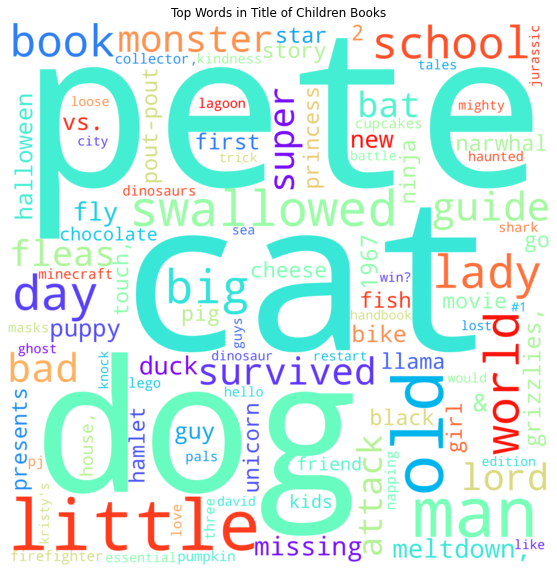

In [0]:
# create the WordCloud object

from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

wordcloud = WordCloud(width=3500,height=3500,normalize_plurals=False, background_color='white', colormap='rainbow')

# generate the word cloud
result_dict=dict(zip(df["word2"], df['frequency']))
wordcloud.generate_from_frequencies(result_dict)

#plot
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top Words in Title of Children Books")
plt.axis('off')
plt.show()

### Question 7. Is income related to sales?

In [0]:
%sql

select HHI_band, round(sum(total_units*unit_price), 0) as total_sales
from bookstable
where HHI_band is not null
group by HHI_band
order by HHI_band

HHI_band,total_sales
"10,000 to 20,000",26574.0
"20,000 to 30,000",252789.0
"30,000 to 40,000",1560406.0
"40,000 to 50,000",3346888.0
"50,000 to 60,000",3465095.0
"60,000 to 70,000",2727829.0
"70,000 to 80,000",2024195.0
"80,000 to 90,000",1548086.0
"90,000 to 100,00",1121695.0
"Less than 10,000",1115.0


## Take Home Assignment

For take home, please answer the following questions:
 - Develop at least five queries to understand trends you see in the data. What does the data suggest about Scholastic’s distribution channels, and how would you recommend structuring a distribution strategy? 
 - What other publically available data can you append (Census, state, region, etc.), to provide further insight? Please import at least one dataset in your analysis. 

Please develop proper Spark SQL queries for each query, visualize the result and write a few paragraphs to discuss your findings. You need to label each question and submit the completed notebook  with all visulizations (in html format) by the due date.